<a href="https://colab.research.google.com/github/Prism194/Paper_ML/blob/main/Paper_ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The analysis of the rate of carbon dioxide adsorption has been conducted in many ways, but there is no clear consensus on the general formula to explain this. Magnesium oxide-based adsorbents have similar adsorption modifications. Among them, we would like to check which formula is suitable through machine learning for the overall result of adsorbing the adsorbent to which urea is added at the maximum temperature of 300°C.

In [1]:
# Import required models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

In [2]:
# Data preparation(If you contact davidchan1@hanyang.ac.kr , I will check and give you experimental data.)
data = pd.read_csv()

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,Seconds,Weight (%)
0,1,99.927960
1,2,99.924815
2,3,99.922406
3,4,99.918158
4,5,99.914946


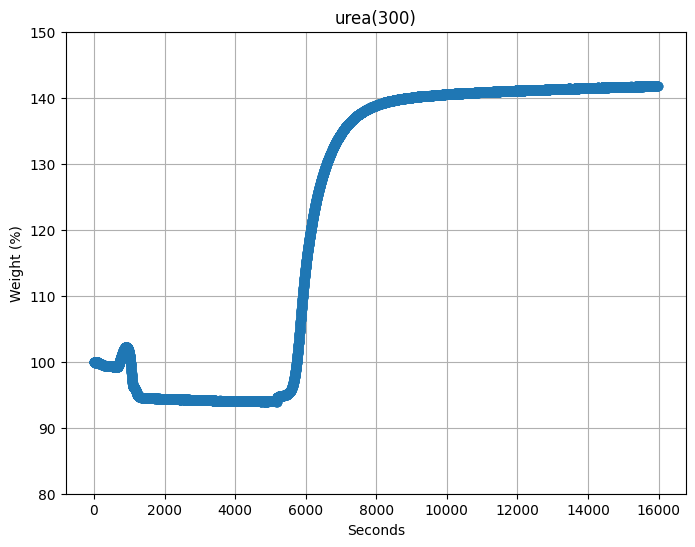

In [5]:
# Original graph
plt.figure(figsize=(8, 6))
plt.plot(df['Seconds'], df['Weight (%)'], marker='o')  # 선 그래프

# Graph settings
plt.ylim(80, 150)

plt.xlabel('Seconds')
plt.ylabel('Weight (%)')
plt.title('urea(300)')
plt.grid(True)
plt.show()

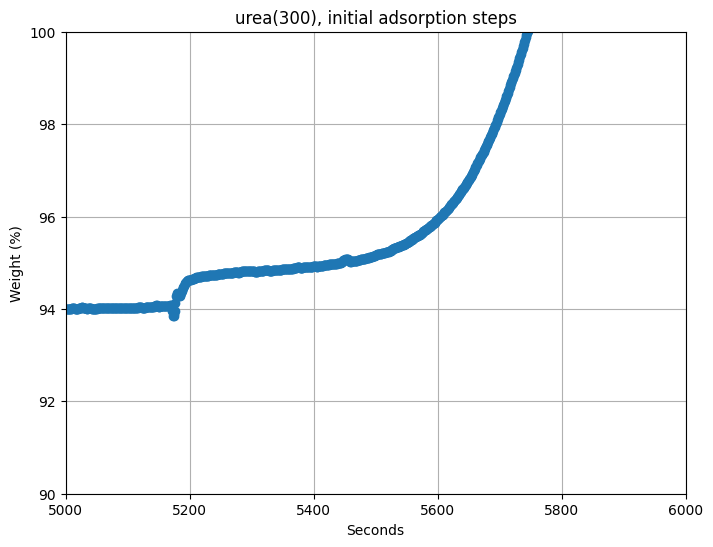

In [6]:
# Graph of initial adsorption steps
plt.figure(figsize=(8, 6))
plt.plot(df['Seconds'], df['Weight (%)'], marker='o')

plt.xlim(5000, 6000)
plt.ylim(90, 100)

plt.xlabel('Seconds')
plt.ylabel('Weight (%)')
plt.title('urea(300), initial adsorption steps')
plt.grid(True)
plt.show()

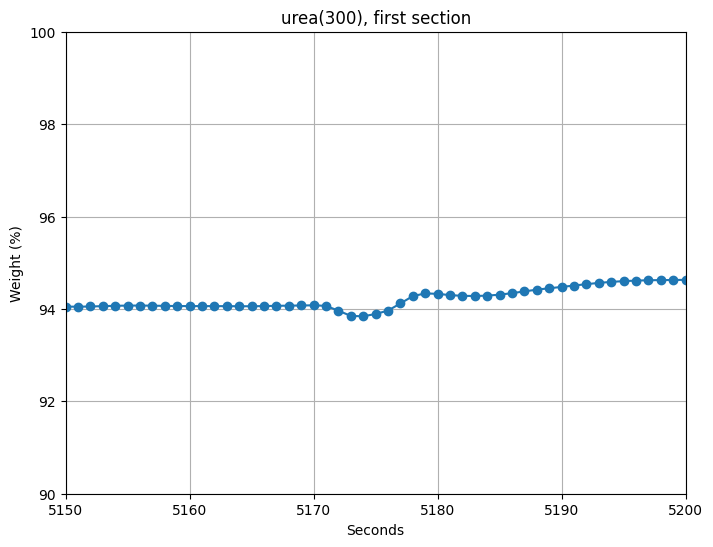

In [7]:
# Graph near the primary adsorption points
plt.figure(figsize=(8, 6))
plt.plot(df['Seconds'], df['Weight (%)'], marker='o')

plt.xlim(5150, 5200)
plt.ylim(90, 100)

plt.xlabel('Seconds')
plt.ylabel('Weight (%)')
plt.title('urea(300), first section')
plt.grid(True)
plt.show()

As a result of graph observation, it can be interpreted that adsorption started from 5174 seconds and the first adsorption proceeded to 5179 seconds.  
Since the number of data is very small, we will use the entire data for training and calculate the error from the entire data.

In [8]:
# data division
subset1 = df.loc[5173:5178]
subset1

,Seconds,Weight (%)
5173,5174,93.840454
5174,5175,93.890496
5175,5176,93.964736
5176,5177,94.119028
5177,5178,94.278180
5178,5179,94.335594


In [9]:
# Linear regression model
X1 = subset1["Seconds"].values.reshape(-1, 1)
y1 = subset1["Weight (%)"].values

model = LinearRegression()
model.fit(X1, y1)


LinearRegression()

In [10]:
print("slope:", model.coef_[0])
print("intercept:", model.intercept_)

slope: 0.1083726857142872
intercept: -466.919792933341


In [11]:
y1_predict = model.predict(X1)
rmse = (np.sqrt(mean_squared_error(y1, y1_predict)))

print("RMSE:", rmse)

RMSE: 0.03349925745718758


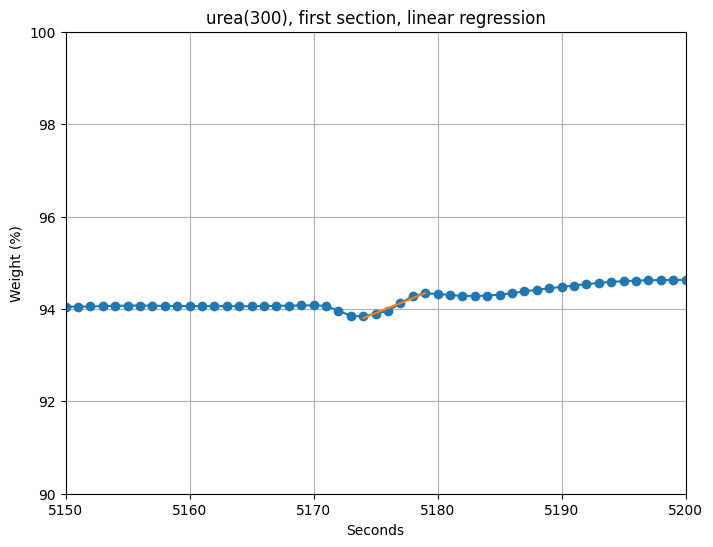

In [12]:
# Fitting on graph
plt.figure(figsize=(8, 6))
plt.plot(df['Seconds'], df['Weight (%)'], marker='o')
plt.plot(X1, y1_predict)

plt.xlim(5150, 5200)
plt.ylim(90, 100)

plt.xlabel('Seconds')
plt.ylabel('Weight (%)')
plt.title('urea(300), first section, linear regression')
plt.grid(True)
plt.show()

It can be seen that this model explains well, both in RMSE values and in graphs

Next, the range of subset will be increased by 1 from 5180 seconds to 5500-5600 seconds. And among the various RMSE values that appear through various linear regression models, the appropriate RMSE value will be selected and the model will be adopted.

Cross-validation will be performed by distinguishing training data, validation data, and test data, and the final error will be found using test data.

In [13]:
# Linear regression model
subset2 = df.loc[5179:5549]

X2 = subset2["Seconds"].values.reshape(-1, 1)
y2 = subset2["Weight (%)"].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.8, random_state = 0)

model = LinearRegression()
model.fit(X2_train, y2_train)

scores = cross_val_score(model , X2_train , y2_train, scoring = 'r2', cv=5)

y2_test_predict = model.predict(X2_test)

rmse = (np.sqrt(mean_squared_error(y2_test, y2_test_predict)))

print("coefficient of determination average for cv:", np.mean(scores))
print("RMSE:", rmse)

coefficient of determination average for cv: 0.8987573613503829
RMSE: 0.06839768178084281


In [14]:
# Boundary point corresponding to the minimum RMSE value
scores = []
rmse_values = []

for i in range(5549, 6001):

  subset2 = df.loc[5179:i]

  X2 = subset2["Seconds"].values.reshape(-1, 1)
  y2 = subset2["Weight (%)"].values

  X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.8, random_state = 0)

  model = LinearRegression()
  model.fit(X2_train, y2_train)

  scores.append(np.mean(cross_val_score(model , X2_train , y2_train, scoring = 'r2', cv=5)))

  y2_test_predict = model.predict(X2_test)
  rmse_values.append(np.sqrt(mean_squared_error(y2_test, y2_test_predict)))

print(min(rmse_values))
print(rmse_values.index(min(rmse_values)))

0.06839768178084281
0


In [15]:
rmse_values

[0.06839768178084281,
 0.07024438850446976,
 0.0807522552025765,
 0.08392474914954508,
 0.08432346390616308,
 0.08707598113605096,
 0.08495139123594456,
 0.07927961236611118,
 0.08433178809535406,
 0.08155352032245652,
 0.08431805742785975,
 0.0844194170968427,
 0.08171928792401416,
 0.08255205169153355,
 0.08666267453056781,
 0.0832902448901985,
 0.0857847762534933,
 0.0844648756948511,
 0.08735413421574928,
 0.08157304545646922,
 0.08413945582467858,
 0.08214215066590065,
 0.1004089968063654,
 0.10415982472755508,
 0.0940458801893795,
 0.0882391929032011,
 0.09326873111897223,
 0.09788301538187619,
 0.09177854679677343,
 0.09250525757546234,
 0.10287181131915184,
 0.10410949770491704,
 0.09827478366736746,
 0.09733801842112585,
 0.09838299572228207,
 0.09574607197831461,
 0.10957268233905394,
 0.10930841743354532,
 0.11112003898517263,
 0.10236566569931435,
 0.10619038002864083,
 0.11058750155713001,
 0.11113544296600304,
 0.10601798816696074,
 0.10644323519624506,
 0.116711273849365

As the range of the data increases, the error value increases, so the boundary point should be determined based on an appropriate RMSE value.  
When 0.1 is used as the criterion for the RMSE value, it is verified as follows.

In [16]:
# If 0.1 is set as the criterion for RMSE
print(rmse_values.index(0.9293968740505578))

227


In [17]:
# Linear regression model
subset2 = df.loc[5179:5776]

X2 = subset2["Seconds"].values.reshape(-1, 1)
y2 = subset2["Weight (%)"].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.8, random_state = 0)


model = LinearRegression()
model.fit(X2_train, y2_train)

scores = cross_val_score(model , X2_train , y2_train, scoring = 'r2', cv=5)

y2_test_predict = model.predict(X2_test)
y2_predict = model.predict(X2)

rmse = (np.sqrt(mean_squared_error(y2_test, y2_test_predict)))

print("coefficient of determination average for cv:", np.mean(scores))
print("RMSE:", rmse)

coefficient of determination average for cv: 0.6843513380631303
RMSE: 0.9293968740505578


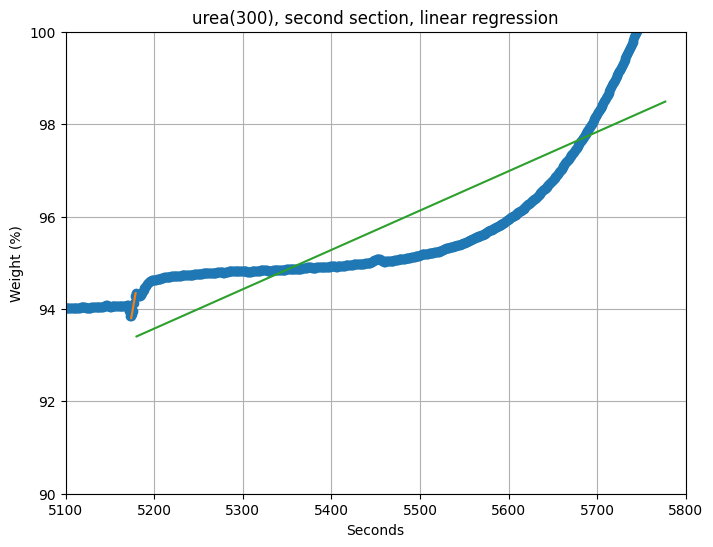

In [18]:
# Find the point where adsorption begins between 5000 and 6000 second
plt.figure(figsize=(8, 6))
plt.plot(df['Seconds'], df['Weight (%)'], marker='o')
plt.plot(X1, y1_predict)
plt.plot(X2, y2_predict)

plt.xlim(5100, 5800)
plt.ylim(90, 100)

plt.xlabel('Seconds')
plt.ylabel('Weight (%)')
plt.title('urea(300), second section, linear regression')
plt.grid(True)
plt.show()

Reducing the number to the point where the visual gap between the data and the model is small is as follows.

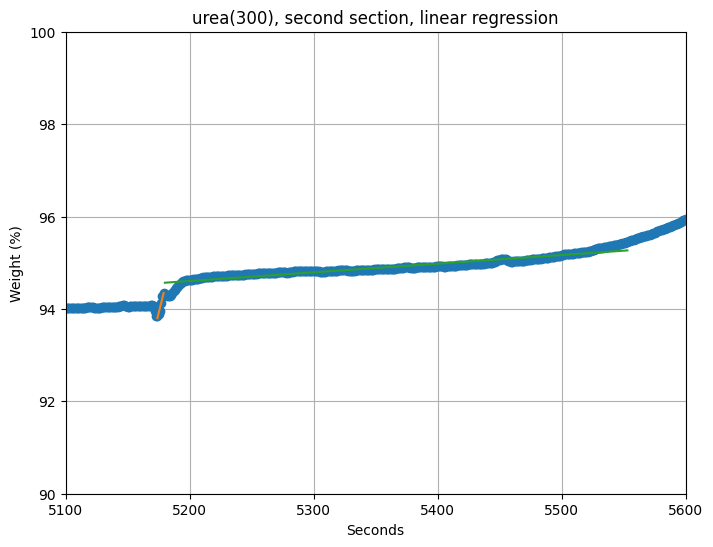

In [19]:
# Linear regression model
subset2 = df.loc[5179:5552]

X2 = subset2["Seconds"].values.reshape(-1, 1)
y2 = subset2["Weight (%)"].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.8, random_state = 0)


model = LinearRegression()
model.fit(X2_train, y2_train)

y2_predict = model.predict(X2)

plt.figure(figsize=(8, 6))
plt.plot(df['Seconds'], df['Weight (%)'], marker='o')
plt.plot(X1, y1_predict)
plt.plot(X2, y2_predict)

plt.xlim(5100, 5600)
plt.ylim(90, 100)

plt.xlabel('Seconds')
plt.ylabel('Weight (%)')
plt.title('urea(300), second section, linear regression')
plt.grid(True)
plt.show()

In [20]:
# Cross-validation and RMSE calculation
scores = cross_val_score(model , X2_train , y2_train, scoring = 'r2', cv=5)

y2_test_predict = model.predict(X2_test)

rmse = (np.sqrt(mean_squared_error(y2_test, y2_test_predict)))

print("slope:", model.coef_[0])
print("intercept:", model.intercept_)

print("coefficient of determination average for cv:", np.mean(scores))
print("RMSE:", rmse)

slope: 0.001875290826700195
intercept: 84.8528946714147
coefficient of determination average for cv: 0.9059655547153715
RMSE: 0.08392474914954508


As a result of actual statistics, it is highly likely that it is not overfitting.  
Next, we will look at the part where actual adsorption occurs in earnest.

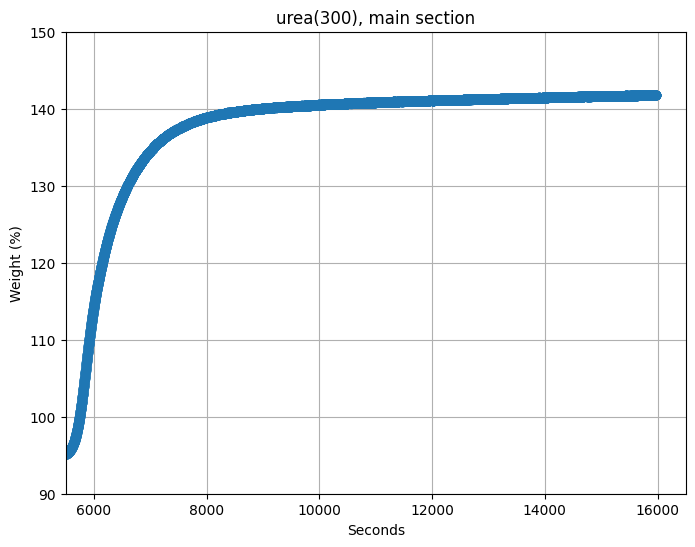

In [21]:
# Graph of the part of interest
plt.figure(figsize=(8, 6))
plt.plot(df['Seconds'], df['Weight (%)'], marker='o')

plt.xlim(5500, 16500)
plt.ylim(90, 150)

plt.xlabel('Seconds')
plt.ylabel('Weight (%)')
plt.title('urea(300), main section')
plt.grid(True)
plt.show()

Logarithmic function + exponential function or quadratic function seems possible.  
Alternatively, the sigmoid function, which is an S-shaped function, can be introduced.  
In order to introduce the logarithmic function, the data value was transformed as follows.

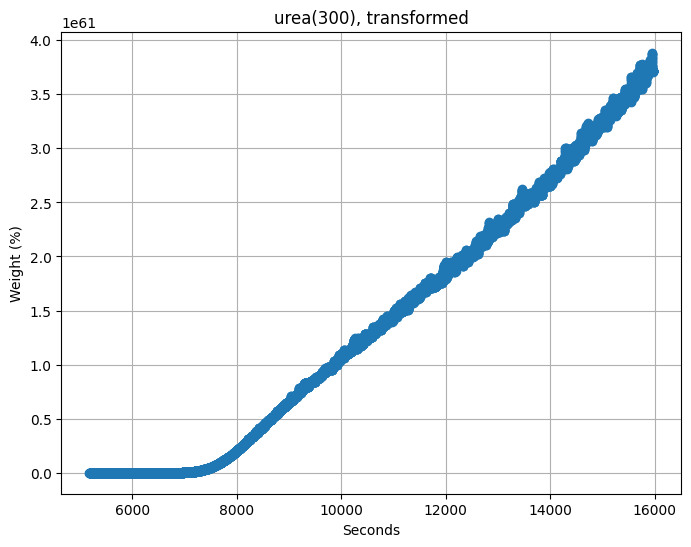

In [22]:
# Data transformation
subset3 = df.loc[5179:]

X3 = subset3["Seconds"].values.reshape(-1, 1)
y3 = np.exp(subset3["Weight (%)"].values)

plt.figure(figsize=(8, 6))
plt.plot(X3, y3, marker='o')

plt.xlabel('Seconds')
plt.ylabel('Weight (%)')
plt.title('urea(300), transformed')
plt.grid(True)
plt.show()

Since the graph is drawn in a straight line from around 7500, the boundary point for the part will be first found, and a linear regression will be performed to ultimately obtain a logarithmic function.

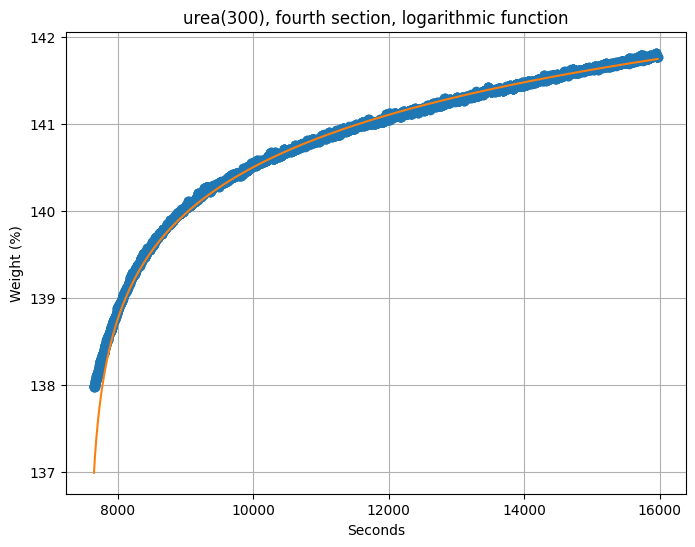

In [23]:
# Linear regression model
subset3 = df.loc[7650:]

X3 = subset3["Seconds"].values.reshape(-1, 1)
y3 = np.exp(subset3["Weight (%)"].values)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size = 0.8, random_state = 0)

model = LinearRegression()
model.fit(X3_train, y3_train)

scores = cross_val_score(model , X3_train , y3_train, scoring = 'r2', cv=5)

y3_predict = model.predict(X3)

plt.figure(figsize=(8, 6))
plt.plot(X3, np.log(y3), marker='o')
plt.plot(X3, np.log(y3_predict))

plt.xlabel('Seconds')
plt.ylabel('Weight (%)')
plt.title('urea(300), fourth section, logarithmic function')
plt.grid(True)
plt.show()

RMSE 계산을 predict한 값을 통해 np.log를 취했을 때, NaN값이 발생하였다. 그래서 직접 식에 데이터를 대입하여 계산하는 방식을 채택하였다.


In [24]:
# Statistics calculation
subset3 = df.loc[7650:]

X3 = subset3["Seconds"].values.reshape(-1, 1)
y3 = subset3["Weight (%)"].values

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size = 0.8, random_state = 0)

slope = model.coef_[0]
intercept = model.intercept_
print("slope:", slope)
print("intercept:", intercept)

y3_predict_real = np.log(slope * X3 + intercept)

rmse = np.sqrt(mean_squared_error(y3, y3_predict_real))

print("coefficient of determination average for cv:", np.mean(scores))
print("RMSE:", rmse)

slope: 4.3074249435294244e+57
intercept: -3.264317629362916e+61
coefficient of determination average for cv: 0.9963917798003596
RMSE: 0.09131924769864638


Therefore, no overfitting occurred, and it can be seen that the model adequately explains the phenomenon.  
Fitting is required in the last section, 5553:7649.

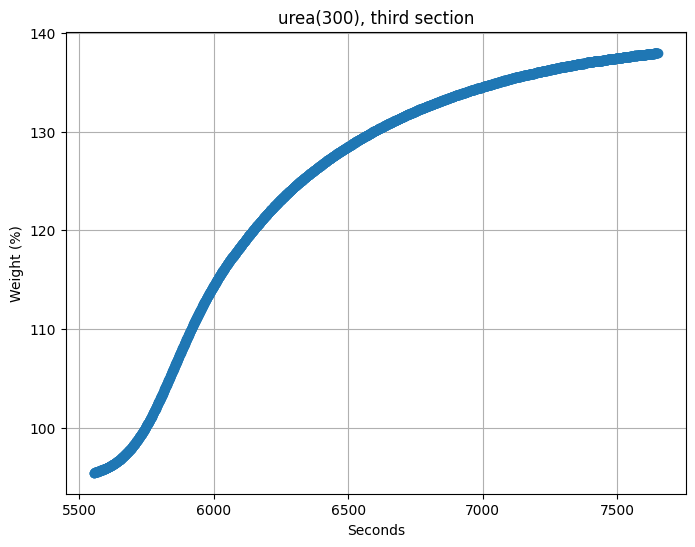

In [25]:
# Graph of the part of interest
subset4 = df.loc[5553:7649]

X4 = subset4["Seconds"].values.reshape(-1, 1)
y4 = subset4["Weight (%)"].values

plt.figure(figsize=(8, 6))
plt.plot(X4, y4, marker='o')

plt.xlabel('Seconds')
plt.ylabel('Weight (%)')
plt.title('urea(300), third section')
plt.grid(True)
plt.show()

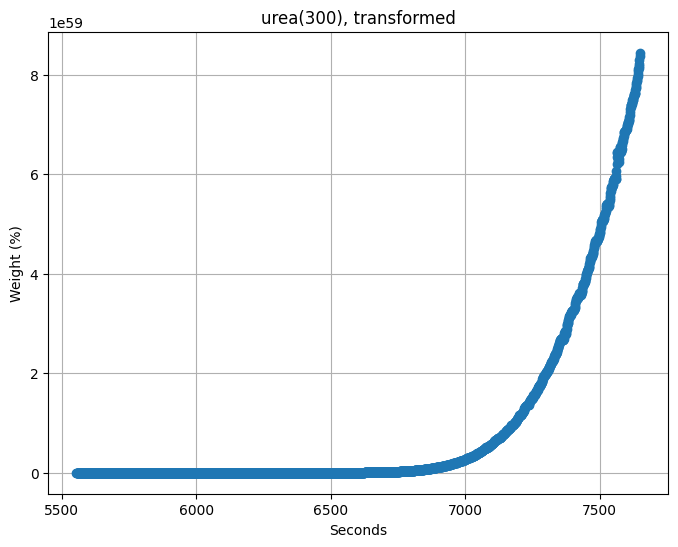

In [26]:
# Data transformation
subset4 = df.loc[5553:7649]

X4 = subset4["Seconds"].values.reshape(-1, 1)
y4 = np.exp(subset4["Weight (%)"].values)

plt.figure(figsize=(8, 6))
plt.plot(X4, y4, marker='o')

plt.xlabel('Seconds')
plt.ylabel('Weight (%)')
plt.title('urea(300), transformed')
plt.grid(True)
plt.show()

It can be seen that it is far from a logarithmic function.  
Using quadratic functions first is as follows.

coefficient of determination average for cv: 0.9899084172573136
RMSE: 1.3056673206274598


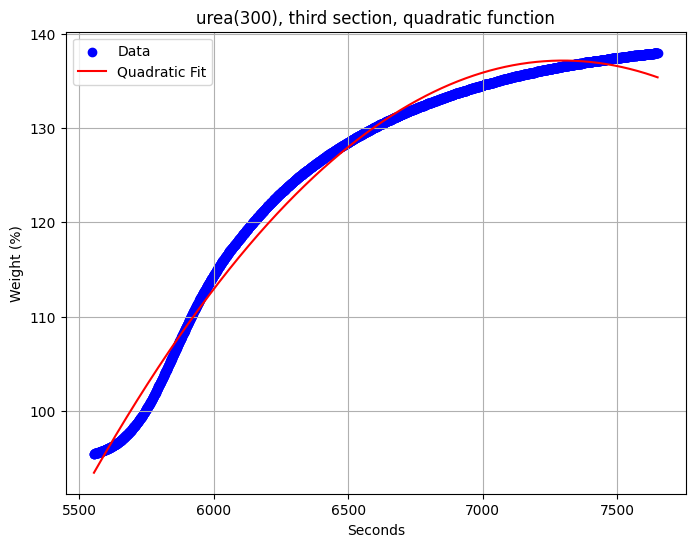

In [27]:
# Regression to quadratic function
subset4 = df.loc[5553:7649]
X4 = subset4["Seconds"].values.reshape(-1, 1)
y4 = subset4["Weight (%)"].values

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, train_size=0.8, random_state=0)

poly = PolynomialFeatures(degree=2)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

model = LinearRegression()
model.fit(X4_train_poly, y4_train)

scores = cross_val_score(model, X4_train_poly, y4_train, scoring='r2', cv=5)

y4_test_predict = model.predict(X4_test_poly)

X4_poly = poly.transform(X4)
y4_predict = model.predict(X4_poly)

rmse = np.sqrt(mean_squared_error(y4_test, y4_test_predict))
print("coefficient of determination average for cv:", np.mean(scores))
print("RMSE:", rmse)

plt.figure(figsize=(8, 6))
plt.scatter(X4, y4, color='blue', label='Data')
plt.plot(X4, y4_predict, color='red', label='Quadratic Fit')
plt.xlabel('Seconds')
plt.ylabel('Weight (%)')
plt.title('urea(300), third section, quadratic function')
plt.legend()
plt.grid(True)
plt.show()

Error analysis showed not bad performance. However, since there is a clear difference between visible data, we will increase the order or try another kind of function.

coefficient of determination average for cv: 0.995867474113237
RMSE: 0.9152113518388805


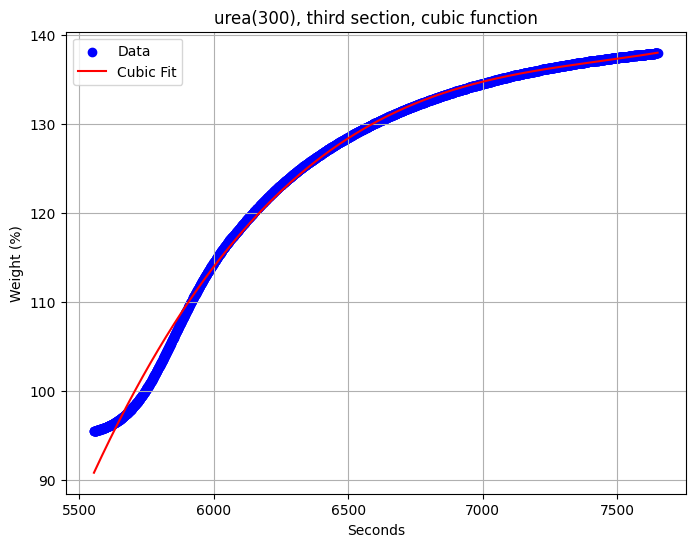

In [28]:
# Regression to a cubic function
subset4 = df.loc[5553:7649]
X4 = subset4["Seconds"].values.reshape(-1, 1)
y4 = subset4["Weight (%)"].values

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, train_size=0.8, random_state=0)

poly = PolynomialFeatures(degree=3)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

model = LinearRegression()
model.fit(X4_train_poly, y4_train)

scores = cross_val_score(model, X4_train_poly, y4_train, scoring='r2', cv=5)

y4_test_predict = model.predict(X4_test_poly)

X4_poly = poly.transform(X4)
y4_predict = model.predict(X4_poly)

rmse = np.sqrt(mean_squared_error(y4_test, y4_test_predict))
print("coefficient of determination average for cv:", np.mean(scores))
print("RMSE:", rmse)

plt.figure(figsize=(8, 6))
plt.scatter(X4, y4, color='blue', label='Data')
plt.plot(X4, y4_predict, color='red', label='Cubic Fit')
plt.xlabel('Seconds')
plt.ylabel('Weight (%)')
plt.title('urea(300), third section, cubic function')
plt.legend()
plt.grid(True)
plt.show()

The error was significantly reduced as a result of increasing the order by three orders.  
However, since the data near the 5500 is S-shaped, the sigmoid function can be used.

Optimized parameters:
a (slope): 0.002408260419376494
b (center): 5628.349048002091
c (maximum value): 83.89856182740249
d (minimum value): 53.98884891509932
RMSE: 0.7829902564533904


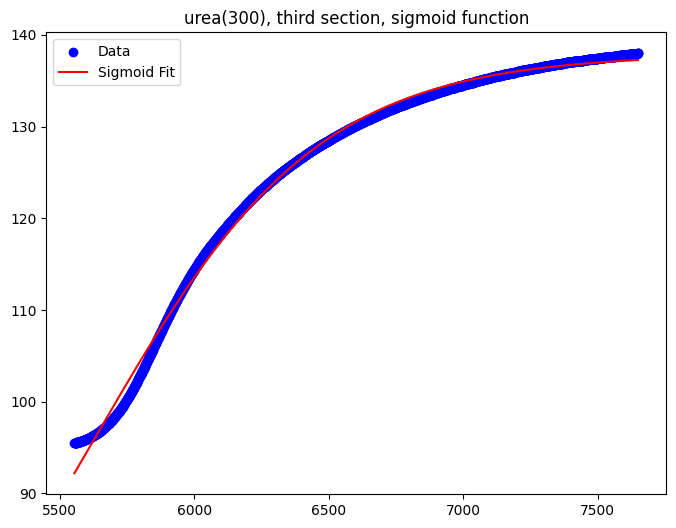

In [29]:
# Regression to a sigmoid function
subset4 = df.loc[5553:7649]
X4 = subset4["Seconds"].values.reshape(-1, 1)
y4 = subset4["Weight (%)"].values

def sigmoid(x, a, b, c, d):
    return c / (1 + np.exp(-a * (x - b))) + d

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, train_size=0.8, random_state=0)

popt, pcov = curve_fit(sigmoid, X4_train.flatten(), y4_train, p0=[0.1, np.mean(X4), np.max(y4), 0])

y4_predict = sigmoid(X4.flatten(), *popt)

a, b, c, d = popt

print("Optimized parameters:")
print(f"a (slope): {a}")
print(f"b (center): {b}")
print(f"c (maximum value): {c}")
print(f"d (minimum value): {d}")

y4_test_predict = sigmoid(X4_test.flatten(), *popt)
rmse = np.sqrt(mean_squared_error(y4_test, y4_test_predict))
print("RMSE:", rmse)

y4_predict = sigmoid(X4.flatten(), *popt)

plt.figure(figsize=(8, 6))
plt.scatter(X4, y4, color='blue', label='Data')
plt.plot(X4, y4_predict, color='red', label='Sigmoid Fit')
plt.title('urea(300), third section, sigmoid function')
plt.legend()
plt.show()


As a result of using the sigmoid function, it can be seen that the error was greatly reduced and the accuracy was also high in the graph.  
cf. Cross-validation was not scored separately because cross_val_score is not directly available.

I thought that the sigmoid function could explain the linear part before 5552, so I added that part, but the error increased noticeably.  
The results of comparing all fitting performed so far with actual data are as follows.

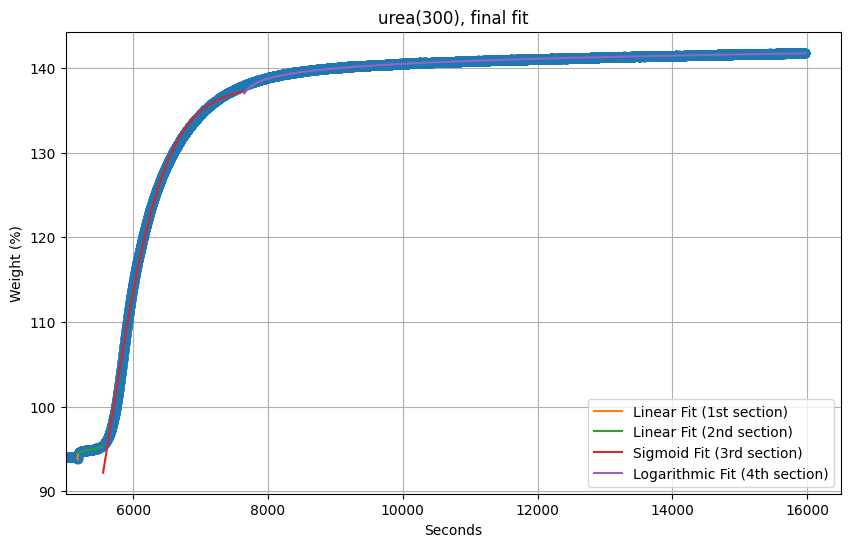

In [30]:
# Final graph
plt.figure(figsize=(10, 6))
plt.plot(df['Seconds'], df['Weight (%)'], marker='o')
plt.plot(X1, y1_predict, label='Linear Fit (1st section)')
plt.plot(X2, y2_predict, label='Linear Fit (2nd section)')
plt.plot(X4, y4_predict, label='Sigmoid Fit (3rd section)')
plt.plot(X3, y3_predict_real, label='Logarithmic Fit (4th section)')

plt.xlim(5000, 16500)

plt.xlabel('Seconds')
plt.ylabel('Weight (%)')
plt.title('urea(300), final fit')
plt.grid(True)
plt.legend()
plt.show()

1st section (linear)   
RMSE : 0.0335  
2nd section (linear)  
Average verification coefficient: 0.9059655547153715  
RMSE : 0.0839  
3rd Section (sigmoid)  
RMSE : 0.7830  
4th section (log)  
Average verification coefficient: 0.9964  
RMSE : 0.0913

The formula is as follows
1st section : $y = 0.1084 \cdot x - 466.9198$  
2nd section : $y = 0.001875 \cdot x + 84.8529$  
3rd section : $y = \frac{83.8986}{1 + \exp\left(-0.002408 \cdot (x - 5628.3490)\right)} + 53.9888$  
4th section : $\ln\left(4.3074 \cdot 10^{57} \cdot x - 3.2643 \cdot 10^{61}\right)$


The shape of the function shown in the logarithmic function section and the sigmoid function section is similar. Therefore, the sigmoid function was extended.

Optimized parameters:
a (slope): 0.0014089579885217338
b (center): 102.86512296537981
c (maximum value): 109072.08325331776
d (minimum value): -108931.03389347551
RMSE: 0.6211744779138887


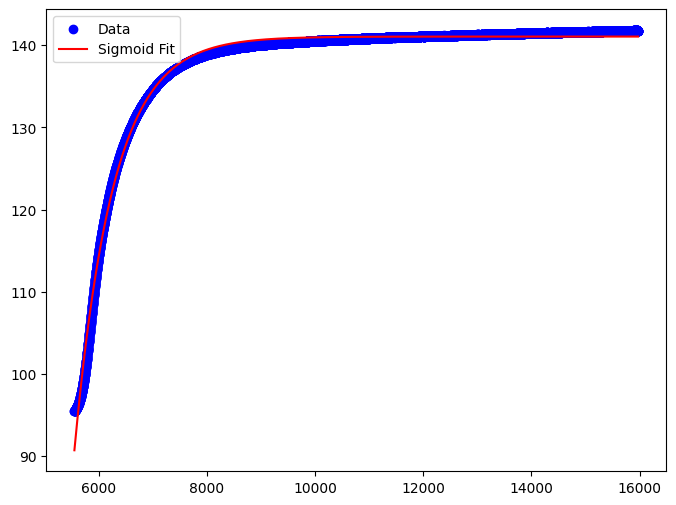

In [31]:
# Graph with extended sigmoid function section
subset4 = df.loc[5553:]
X4 = subset4["Seconds"].values.reshape(-1, 1)
y4 = subset4["Weight (%)"].values

def sigmoid(x, a, b, c, d):
    return c / (1 + np.exp(-a * (x - b))) + d

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, train_size=0.8, random_state=0)

popt, pcov = curve_fit(sigmoid, X4_train.flatten(), y4_train, p0=[0.1, np.mean(X4), np.max(y4), 0], maxfev = 10000) # 초기값 설정

y4_predict = sigmoid(X4.flatten(), *popt)

a, b, c, d = popt

print("Optimized parameters:")
print(f"a (slope): {a}")
print(f"b (center): {b}")
print(f"c (maximum value): {c}")
print(f"d (minimum value): {d}")

y4_test_predict = sigmoid(X4_test.flatten(), *popt)
rmse = np.sqrt(mean_squared_error(y4_test, y4_test_predict))
print("RMSE:", rmse)

y4_predict = sigmoid(X4.flatten(), *popt)

plt.figure(figsize=(8, 6))
plt.scatter(X4, y4, color='blue', label='Data')
plt.plot(X4, y4_predict, color='red', label='Sigmoid Fit')
plt.legend()
plt.show()


Although the RMSE value of the log function was much lower when the section was divided into two, the RMSE value in the third section decreased.  
In addition, it was confirmed that no significant error occurred in data fitting even if the range of the sigmoid function was extended to the area of the existing log function.

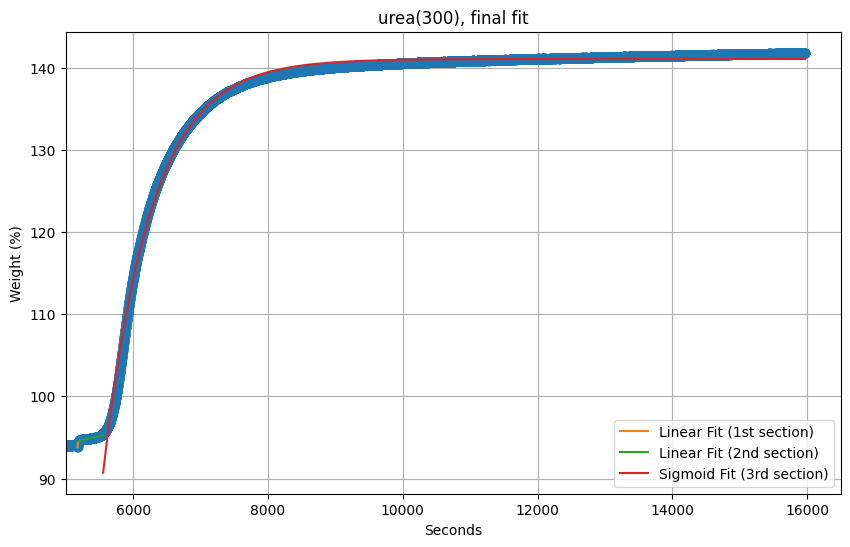

In [32]:
# Final graph with extended sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(df['Seconds'], df['Weight (%)'], marker='o')
plt.plot(X1, y1_predict, label='Linear Fit (1st section)')
plt.plot(X2, y2_predict, label='Linear Fit (2nd section)')
plt.plot(X4, y4_predict, label='Sigmoid Fit (3rd section)')

plt.xlim(5000, 16500)

plt.xlabel('Seconds')
plt.ylabel('Weight (%)')
plt.title('urea(300), final fit')
plt.grid(True)
plt.legend()
plt.show()

The formula is as follows  
1st section : $y = 0.1084 \cdot x - 466.9198$  
2nd section : $y = 0.001875 \cdot x + 84.8529$  
3rd section : $y = \frac{109072.08325}{1 + \exp\left(-0.001409 \cdot (x - 102.8651)\right)} - 108931.0339$

As a result, it can be seen that most of the adsorption sections of the urea adsorbent follow the sigmoid function.  
And after a lot of adsorption, a better prediction value can be obtained by applying the logarithmic function.